In [2]:
import openpyxl
import math
import matplotlib.pylab as plt
import numpy as np
import scipy.special

book = openpyxl.open("table.xlsx")

sheet = book.active

value_1 =[]
value_2 =[]

P_hz_1 = []
P_hz_2 = []

channels = 10

t = 30

# Статистика регистрации частиц 

1) Для каждой из измеренных серий рассчитываются оценки среднего значения числа отсчетов $\mu^\ast$ и стандартной ошибки среднего по формуле:

$$\mu^\ast = \frac{1}{N} \sum_{i=1}^N{x_i}$$

$$\sigma_\mu^\ast = \frac{\sigma^\ast}{\sqrt{N}} = \sqrt{\frac{\sum_{i=1}^N{(\mu^\ast -x_i)^2}}{\sqrt{N(N-1)}}}$$

Оценка стандартной ошибки может быть получена и другим образом: оценить дисперсию распределения Пуассона можно из полученного среднего значения, что дает возможность найти стандартную ошибку по формуле:

$$\sigma_\mu = \sqrt{\frac{D[x]}{N}} = \frac{\sigma}{\sqrt{N}}$$

Поскольку в первом случае оценка стандартной ошибки не зависит от распределения,
а во втором явно предполагается, что величина подчиняется распределению Пуассона, то из сравнения двух оценок стандартной ошибки можно сделать вывод о том,
соответствует ли наблюдаемое распределение закону Пуассона.

Также необходимо найти среднюю скорость счета и ее погрешность по формуле:



$$I=\frac{\mu}{\Delta t}$$

In [3]:
def St_err_sr(a):
    amount = 0
    for i in range(0,len(a)):
        amount += ((np.mean(a) - a[i])**2)
    return((amount/len(a)/(len(a)-1))**0.5)

def St_err_sr_Puasson(a):
    return((np.mean(a)/len(a))**0.5)

def Sr_speed(a,t):
    return(np.mean(a)/t)

2) Результаты измерений в двух упражнениях изображаются в виде гистограмм распределения частот. Для удобства сравнения гистограммы обоих серий измерений строятся на одном листе друг над другом, с одинаковыми пределами и масштабом по оси $X$ и с одинаковой шириной канала $\Delta x$. При построении гистограмм исходные значения частот сначала заносятся в тетрадь в виде таблицы.


3) На одном графике с каждой гистограммой изображаются: точками — теоретические значения вероятностей распределения Пуассона с параметром $\mu = \mu^\ast$, сплошнойкривой — нормальное распределение с параметрами $\mu = \mu^\ast, \sigma =\sqrt{\mu^\ast}$

4) Строятся эмпирические функции распределений выборок обоих упражнений и с помощью критерия Колмогорова проверяется однородность двух выборок. Для этого результаты заносятся в таблицу следующего вида:

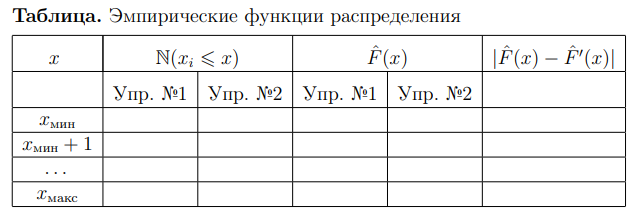

Здесь $x_{min}$ и $x_{max}$ — это, соотвественно, максимальное и минимальное число импульсов, зарегистрированных в обоих упражнениях, $N(x_i \le x)$ означает число измерений в которых число зарегистрированных импульсов не превышало $x$, а $\hat{F}(x)$ — эмпирическая функция распределения, рассчитанная по формуле:

$$\hat{F}(x)=\frac{N(x_i \le x)}{N}$$

Затем находится максимальное значение модуля разности эмпирических распределений и рассчитывается значение статистики $t$. Если $t$ превышает значение $K_{\alpha}$ при заданном уровне доверия $1−\alpha$, то гипотеза однородности распределений отвергается, и делается вывод, что распределения в первом и втором упражнениях отличаются, т.е. неизвестный источник является радиоактивным.

Полученные эмпирические функции распределения изображены графически на одном графике. Поскольку число точек по оси $X$ велико, рекомендуется строить график на компьютере. Если график строится вручную, то достаточно наносить точки через каждые 3—5 значений

<ipython-input-4-b4a0c6c4df6d>:109: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(k, P_hz_1, label = 'эксперимент', color = '', edgecolor = 'b', width = 1)


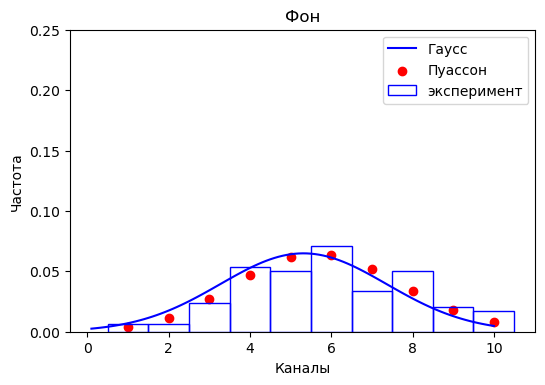

<ipython-input-4-b4a0c6c4df6d>:122: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(k, P_hz_2, label = 'эксперимент', color = '', edgecolor = 'b', width = 1)


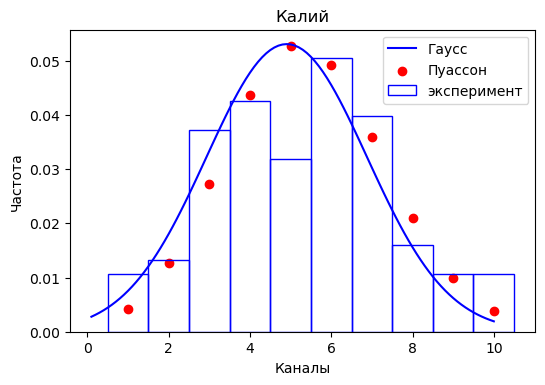

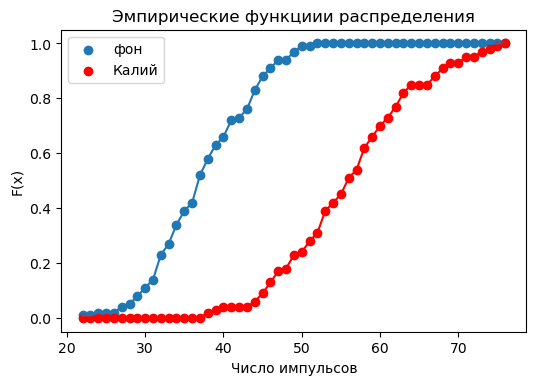

In [4]:
def Frequency(a, channels):
    P = []
    dx = (max(a) - min(a))/channels
    for k in range(1, channels+1):
        amount = 0
        for i in range(0, len(a)):
            if a[i] >= (min(a) + (k-1)*dx) and a[i] < (min(a) + k*dx):
                amount += 1
        P.append(amount/len(a))
    s = 0
    for i in range(0, channels):
        s += dx*P[i]
    for i in range(0, channels):
        P[i] = P[i]/s
    return(P)

def puasson(a, channels):
    dx = (np.max(a) - np.min(a)) / channels
    K = np.min(a) + dx / 2 + np.arange(channels) * dx
    sr=np.mean(a)
    return np.exp(-sr)*((sr**K)/(scipy.special.factorial(K)))

def gaussian(a, channels):
    channels = channels*10
    dx = (np.max(a) - np.min(a)) / channels
    sr = np.mean(a)
    sic = np.sqrt(sr)
    K = np.min(a) + dx / 2 + np.arange(channels) * dx
    return 1/(np.sqrt(2*np.pi)*sic)*np.exp(-(((K-sr)**2)/(2*(sic**2))))


def Empir(value_1, value_2):
    F = []
    x = []
    leng = max(max(value_1),max(value_2)) - min(min(value_1),min(value_2))
    for i in range(0, leng+1):
        x.append(min(min(value_1),min(value_2)) + 1*i)
    for i in range(0, leng+1):
        amount = 0
        for j in range(0,len(value_1)):
            if value_1[j] <= x[i]:
                amount += 1
        F.append(amount/len(value_1))
    return(F)

def X_empir(value_1, value_2):
    x = []
    leng = max(max(value_1),max(value_2)) - min(min(value_1),min(value_2))
    for i in range(0, leng+1):
        x.append(min(min(value_1),min(value_2)) + i)
    return(x)


def Sup(F1, F2):
    F = []
    for i in range(0, len(F1)):
        F.append(np.fabs(F2[i]-F1[i]))
    D = np.max(F)
    t = np.sqrt(0.5*100)*D
    return(t)

    
for row in range(2,102):
    value_1.append(sheet[row][1].value)
    
for row in range(2,102):
    value_2.append(sheet[row][2].value)
    
SR_value_1 = np.mean(value_1)
SR_value_2 = np.mean(value_2)

St_err_sr_value_1 = St_err_sr(value_1)
St_err_sr_value_2 = St_err_sr(value_2)

St_err_sr_Puasson_value_1 = St_err_sr_Puasson(value_1)
St_err_sr_Puasson_value_2 = St_err_sr_Puasson(value_2)

I1 = Sr_speed(value_1,t)
I2 = Sr_speed(value_2,t)

SI1 = St_err_sr_value_1/t
SI2 = St_err_sr_value_2/t

P_hz_1 = Frequency(value_1, channels)
P_hz_2 = Frequency(value_2, channels)

puasson_1 = puasson(value_1, channels)
puasson_2 = puasson(value_2, channels)

gaussian_1 = gaussian(value_1, channels)
gaussian_2 = gaussian(value_2, channels)

F_empir_1 = Empir(value_1, value_2)
F_empir_2 = Empir(value_2, value_1)

X_empir = X_empir(value_1, value_2)

T = Sup(F_empir_1, F_empir_2)


k = [1,2,3,4,5,6,7,8,9,10]
k2 = []
for i in range(1, 101):
    k2.append(i/10)

fig, ax = plt.subplots(dpi = 100)

ax.scatter(k, puasson_1, label = 'Пуассон', color = 'red')
ax.bar(k, P_hz_1, label = 'эксперимент', color = '', edgecolor = 'b', width = 1)
ax.plot(k2, gaussian_1, label = 'Гаусс', color = 'blue')
plt.xlabel('Каналы')
plt.ylabel('Частота')
plt.title('Фон')
plt.ylim(0, 0.25)
plt.legend()

plt.show()

fig, ax = plt.subplots(dpi = 100)

ax.scatter(k, puasson_2,  label = 'Пуассон', color = 'red')
ax.bar(k, P_hz_2, label = 'эксперимент', color = '', edgecolor = 'b', width = 1)
ax.plot(k2, gaussian_2, label = 'Гаусс', color = 'blue')
plt.xlabel('Каналы')
plt.ylabel('Частота')
plt.title('Калий')
plt.legend()

plt.show()

fig, ax = plt.subplots(dpi = 100)

ax.plot(X_empir, F_empir_1)
ax.plot(X_empir, F_empir_2, color='red')
ax.scatter(X_empir, F_empir_1, label = 'фон')
ax.scatter(X_empir, F_empir_2, color='red', label = 'Калий')
plt.xlabel('Число импульсов')
plt.ylabel('F(x)')
plt.title('Эмпирические функциии распределения')
plt.legend()

plt.show()

F = []
for i in range(0, len(F_empir_1)):
        F.append(math.fabs(F_empir_1[i]-F_empir_2[i]))

for i in range(2,len(P_hz_1)+2):
    sheet[i][4].value = P_hz_1[i - 2]
    
for i in range(2,len(P_hz_2)+2):
    sheet[i][5].value = P_hz_2[i - 2]
    
for i in range(2,len(X_empir)+2):
    sheet[i][7].value = X_empir[i - 2]
    
for i in range(2,len(F_empir_1)+2):
    sheet[i][8].value = F_empir_1[i - 2]
    
for i in range(2,len(F_empir_2)+2):
    sheet[i][9].value = F_empir_2[i - 2]
        
for i in range(2,len(F_empir_2)+2):
    sheet[i][10].value = F[i - 2]
    

book.save("table.xlsx")
book.close()

5) Если результатом проверки однородности выборок стал вывод о том, что источник является радиоактивным, то нужно определить скорость счета событий от источника, пользуясь формулой $I_{full} = I_{backgraund} + I_{truth}$.


Зная массу источника, процентное содержание изотопа $^{40}K$ в природном калии $v = 0, 012\%$, период полураспада $T_{1/2}(^{40}K) = 1, 248 · 109$ лет, процентное содержания калия в калийном удобрении, используемом в качестве источника, необходимо оценить вероятность регистрации $\beta-$распадов изотопа $^{40}K$ детектором. При этом следует считать, что детектор закрывает $10\%$ полного телесного угла, в который вылетают продукты распада.

6) Если проверка показала отсутствие радиоактивного изотопа в образце, то измерения из второго упражнения используются для уточнения значения скорости счета фоновых частиц.


Пункты 5) и 6) посчитаны вручную

# Основыне итоги работы

В ходе работы были изучены статистические закономерности изменений в ядерной физике
1) Набрана статистика для двух случаев (с удобрением и без), посчитаны: среднее значения числа отсчетов, стандартная ошибка, отклонение по Поуассону

                                                         1 упражнение:
$$\bar{x}=37.8$$

$$\sigma_x^\ast = 0.63$$

$$\sigma_n = 0.61$$

                                                         2 упражнение:
$$\bar{x}=56.45$$

$$\sigma_n = 0.75$$

$$\sigma_n = 0.75$$

2) Определены скорости счёта событий:

$$I_{background}=(1.26\pm0.03)\space c^{-1}$$

$$I_{truth}=(0,62\pm0.04)\space c^{-1}$$

$$I_{full}=(1.88\pm0.03)\space c^{-1}$$

3) Построены гистограммы частот с наложением теоритического распределения Пуассона и Гаусса

4) Для обоих измерений построены эмпиричекские функции распределения и проверен критерий Колмогорова:
         $$t=5.59>K_\alpha=2.2253\space\space\space\space(1-\alpha=0.9999)$$

Распределения в обоих упражнениях неоднородны с вероятностью 0,9999 $\Rightarrow$ источник радиоактивен

5) Дана оценка вероятности регистрации $\beta-$распадов изотопа $^{40}K$ детектором
$$P=(0.121\pm0.008)\%$$